# Gerador de um movimento Browniano

In [10]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from math import sqrt
from pylab import plot, show, grid, xlabel, ylabel



In [4]:
# Process parameters
delta = 0.25
dt = 0.1

# Initial condition.
x = 0.0

# Number of iterations to compute.
n = 20

# Iterate to compute the steps of the Brownian motion.
for k in range(n):
    x = x + norm.rvs(scale=delta**2*dt)
    print (x)

-0.011899128952875766
-0.007470733146839427
-0.004388561760076734
-0.007165092809288179
-0.0047652341823186395
-0.0026147654624518618
-0.0009989621262392369
0.00477397800852029
-0.0034734834420456304
-0.005779612762718721
-0.005399202190344945
0.0009177570127329527
0.0035414467773656364
0.004804739218501458
0.013268119126443784
0.02171594084749443
0.020636500573736713
0.01875207981403121
0.00347458738152924
0.002362743417323126


In [6]:
def brownian(x0, n, dt, delta, out=None):
    """\
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean 'a' and
    variance 'b'.  The parameters 't0' and 't1' make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

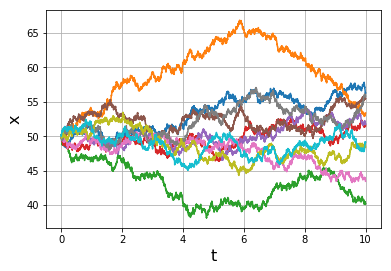

In [14]:
# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 5000
# Time step size
dt = T/N
# Number of realizations to generate.
m = 10
# Create an empty array to store the realizations.
x = np.empty((m,N+1))
# Initial values of x.
x[:, 0] = 50

brownian(x[:,0], N, dt, delta, out=x[:,1:])

t = np.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()
